# Load data

In [ ]:
#pip install biomart


In [ ]:
#pip install gseapy

In [54]:
import pandas as pd
import scanpy as sc
import numpy as np

In [55]:

import gseapy as gp

# Read data

In [56]:
import scanpy as sc

In [39]:
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/time_adata.h5ad")
adata = sc.read("../../data//time_adata_filt_clust_sign_bif.h5ad")

/storage/users/job37yv/shared_conda_envs/scanpy-env3_shared/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [40]:
## make trivial names unique
adata.var_names = adata.var_names.astype(str)
adata.var_names_make_unique()

In [41]:
adata

AnnData object with n_obs × n_vars = 10594 × 650
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 't', 'seg', 'edge', 't_sd', 'milestones', '43->144_lindev_sel', '43->30_lindev_sel', '82->30_lindev_sel'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', '43->144_rss', '43->30_rss', '82->30_rss', 'p_val', 'A', 'fdr', 'st', 'signi', 'clusters'
    uns: '43->144_lindev_sel_colors', '43->30<>144', '43->30<>28', '43->30_lindev_sel_colo

In [42]:
adata.obs.head()

,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_cmo,...,louvain,louvain_combined,t,seg,edge,t_sd,milestones,43->144_lindev_sel,43->30_lindev_sel,82->30_lindev_sel
barcode,,,,,,,,,,,,,,,,,,,,,
AAACCCAGTAGGCTCC-1,CTRL_1,3076,8.031710,15109,9.623112,54.359972,65.514317,73.540856,81.846752,24.628355,...,2,2,0.006304,14,67|13,0.011758,43,putative progenitors,putative progenitors,NaN
AAACCCAGTCGCAACC-1,CTRL_1,4271,8.359837,18912,9.847605,58.422557,66.296003,72.210555,78.996110,34.891727,...,2,2,0.342083,14,159|0,0.043323,43,putative bridge,putative bridge,NaN
AAACCCATCCACAAGT-1,CTRL_1,3517,8.165648,14791,9.601842,48.576595,57.179024,65.667786,75.871868,23.580470,...,5,5,0.087838,14,31|51,0.048672,43,putative bridge,putative bridge,NaN
AAACGCTTCACTACGA-1,CTRL_1,4077,8.313362,18788,9.841027,50.601623,60.215361,68.136395,76.612147,23.367459,...,5,5,0.017375,14,1|61,0.022052,43,putative bridge,putative bridge,NaN
AAACGCTTCAGCCTCT-1,CTRL_1,6263,8.742574,32489,10.388688,47.930883,56.820337,63.782934,71.878976,24.847910,...,6,6,2.114481,8,162|76,0.029623,162,putative bridge,NaN,NaN


# Create dictionary

In [216]:
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line and split it into Ensembl ID and gene name
    decoded_line = line.decode('utf-8')
    ensembl_id, gene_name = decoded_line.split('\t')
    
    # Store the mapping in the dictionary
    ensembl_to_gene_name[ensembl_id] = gene_name

# Now, ensembl_to_gene_name is a dictionary with Ensembl IDs as keys and gene names as values.


ParseError: mismatched tag: line 62, column 2 (<string>)

# Individually define comparison : Define the Comparison and perform the GSEA analysis

## Compare the conditons (testing)

In [27]:
# Create a new column 'cluster_category' based on the 'leiden' clusters
# Category 1: Clusters 3 and 15
# Category 2: Cluster 6
category_mapping = {'3': 'Category1', '15': 'Category1', '2': 'Category2', '7': 'Category2', '14': 'Category2'}
adata.obs['cluster_category'] = adata.obs['leiden'].map(category_mapping)

# Filter adata to include only the rows with the specified clusters (3, 15, 6)
adata = adata[adata.obs['cluster_category'].notnull()].copy()

# Optionally, you can check the first few rows to confirm
#print(adata.obs.head())
adata.obs.cluster_category

barcode
AAGCGTTAGCCTCGTG-1    Category1
ATCGGATGTTGAGGAC-1    Category2
CATGGATGTGTATCCA-1    Category2
CCACGAGTCCCATAAG-1    Category2
CCGAACGAGAAACACT-1    Category2
                        ...    
TTTACTGTCATTACTC-1    Category2
TTTCACAGTGATATAG-1    Category1
TTTCACATCGATGCAT-1    Category1
TTTCATGTCCCTCTAG-1    Category2
TTTGACTGTTCCGGTG-1    Category1
Name: cluster_category, Length: 2896, dtype: object

In [28]:
# filter the adata bject for condition that are intended to compare
bdata = adata[adata.obs.cluster_category.isin(["Category1", "Category2"])].copy()

In [29]:
expression_df = bdata.to_df().T
#expression_df

In [ ]:
expression_df

In [31]:
## perfrom GSEA anaylsis for the selected comparisons

res = gp.gsea(data=expression_df,
    gene_sets="Reactome_2022",
    cls=bdata.obs.cluster_category,
    permutation_num=1000,
   # permutation_type='phenotype',
    outdir=None,
    method='s2n', # signal_to_noise
    threads= 16)



In [ ]:
# print head results
res.res2d.head()
print(res.res2d.head())

# Visualize the top pathways
terms = res.res2d.Term
axs = res.plot(terms[:10], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )


## Compare the Clusters (milestones, leiden)

#### Define the comparisons

In [155]:
# Define a function to label clusters:
# e.g. 5/11 to 2/16 
def label_clusters(cluster):
    if cluster in ["3","15"]:
        return "0"
    elif cluster in ["2","7","14"]:
        return "1"
    else:
        return "NA"  # This label will be used to filter out other clusters

# Create a new categorical column for comparison
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

# Subset the data for only the two groups you're comparing
bdata = adata[adata.obs.compare_clusters.isin(["0", "1"])].copy()

# sort indices to define the direction of comparison (could for interpretation of the results :)
sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
bdata = bdata[sorted_indices]

# create a dataframe from bdata and translae ensembl ID to symbol (if not done before!!)
expression_df = bdata.to_df().T




In [156]:
expression_df

barcode,AAGCGTTAGCCTCGTG-1,TTCCTAATCAGAGTGG-1,TTCCTAACAACCCTAA-1,TTCCGGTTCAAATAGG-1,TTCCACGCAGGCATGA-1,TTCCAATCATTGCCTC-1,TTCATGTTCTGAGGTT-1,TTCAGGATCCTACGAA-1,TTCAGGATCATAGACC-1,TTCACGCCATTGGCAT-1,...,TCGGGTGGTATTCCGA-1,TCGGGTGCACCGTGAC-1,TCGGGTGAGCCTGAAG-1,TCGGGCACAAGCCATT-1,TCGGGCAAGGTAACTA-1,TCGGGCAAGAGGACTC-1,TCGGGACTCTCATGGA-1,TCGGATAAGTGGTTCT-1,TCCCATGCAGTATTCG-1,TCCATCGGTCCGAAAG-1
gene_symbol,,,,,,,,,,,,,,,,,,,,,
HES4,1.982747,3.106007,2.246872,0.979757,2.954812,2.535069,2.645233,1.801167,2.139648,1.639279,...,1.049977,3.130163,0.997049,3.148487,2.419446,2.020846,2.697537,1.791717,1.910758,1.878265
ISG15,0.760183,0.000000,0.000000,0.000000,0.000000,0.000000,1.363067,0.378232,0.559413,0.465660,...,0.000000,0.986899,0.997049,0.000000,1.269735,1.452165,0.000000,0.000000,0.766231,0.000000
C1QTNF12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MFAP2,0.000000,0.000000,0.000000,1.790330,0.000000,1.992890,0.897752,0.652014,0.000000,0.465660,...,1.550785,1.473802,0.617958,1.697478,0.000000,0.000000,0.931426,1.252726,0.766231,1.546448
PADI2,1.187030,0.847254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.271278,0.000000,1.269735,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DANT2,0.000000,0.847254,0.721376,0.000000,0.813169,0.720820,0.000000,0.000000,0.559413,0.782133,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.405177,1.791717,0.766231,0.000000
KLHL13,0.000000,1.299227,0.721376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.749073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNF185,1.347207,0.000000,1.654230,1.790330,0.487058,0.720820,0.000000,1.193470,0.000000,0.465660,...,1.550785,0.000000,0.617958,1.172507,1.269735,0.000000,0.000000,0.000000,0.766231,1.046400


### If neccessary translate ID's to gene symbols

In [294]:
# Gen-IDs aus der Datei extrahieren
deg_gene_ids = expression_df.iloc[:, 0]
deg_gene_ids

HES4        0.770266
ISG15       0.000000
C1QTNF12    0.000000
MFAP2       1.200171
PADI2       0.000000
              ...   
DANT2       0.770266
KLHL13      0.000000
ZNF185      1.200171
L1CAM       0.000000
MT-CO2      4.395234
Name: TATTCCACACGCTGAC-1, Length: 580, dtype: float32

In [295]:
# translate ensembl_to_gene_name
mapping_dict = ensembl_to_gene_name

# Assuming expression_df is your DataFrame with Ensembl IDs (feature_id) as the index
# Map the Ensembl IDs in the index to gene symbols
new_index = expression_df.index.map(lambda x: mapping_dict.get(x, x))
new_index

Index(['HES4', 'ISG15', 'C1QTNF12', 'MFAP2', 'PADI2', 'CAMK2N1', 'HSPG2',
       'ID3', 'SFN', 'SESN2',
       ...
       'SHROOM4', 'OPHN1', 'FTX', 'KLHL4', 'BEX2', 'DANT2', 'KLHL13', 'ZNF185',
       'L1CAM', 'MT-CO2'],
      dtype='object', length=580)

In [296]:
# Replace the index of the original DataFrame
expression_df.index = new_index

# Rename the index name to 'gene_name'
expression_df.index.name = 'gene_name'

In [297]:
#expression_df.head()

### Perform GSEA and visualize

In [298]:
#help(gp.gsea)

In [304]:
## Get the names for the pathway libraries and select one in the gsea function
#names = gp.get_library_name()
#print(names)

In [309]:
#bdata.obs.compare_clusters

In [157]:
# Now you can run GSEA on this filtered data, using the cluster2 label:
# When you are running GSEA, make sure to use the new cluster2 la
res = gp.gsea(data=expression_df,
              #gene_sets="GO_Biological_Process_2023",
              gene_sets="Reactome_2022",
              cls=bdata.obs.compare_clusters, 
              permutation_num=1000,
              outdir=None,
              min_size= 10, 
              max_size = 100,
              method='log2_ratio_of_classes', 
              threads=26)

In [280]:
# print head results
print(res.res2d.head(15))


    Name                                               Term        ES  \
0   gsea  Signaling By Rho GTPases, Miro GTPases And RHO...    0.7485   
1   gsea              Signaling By Rho GTPases R-HSA-194315    0.7485   
2   gsea   Transcriptional Regulation By TP53 R-HSA-3700989  0.844156   
3   gsea                  RHO GTPase Effectors R-HSA-195258  0.839378   
4   gsea                    Cell Cycle, Mitotic R-HSA-69278  0.882411   
5   gsea                           Cell Cycle R-HSA-1640170  0.893584   
6   gsea                                M Phase R-HSA-68886  0.861609   
7   gsea         Generic Transcription Pathway R-HSA-212436  0.621401   
8   gsea        RNA Polymerase II Transcription R-HSA-73857  0.609509   
9   gsea        Gene Expression (Transcription) R-HSA-74160  0.594483   
10  gsea                             Apoptosis R-HSA-109581  0.822932   
11  gsea                Mitotic G2-G2/M Phases R-HSA-453274  0.904469   
12  gsea                        G2/M Transition R-H

0     Signaling By Rho GTPases, Miro GTPases And RHO...
1                 Signaling By Rho GTPases R-HSA-194315
2      Transcriptional Regulation By TP53 R-HSA-3700989
3                     RHO GTPase Effectors R-HSA-195258
4                       Cell Cycle, Mitotic R-HSA-69278
                            ...                        
95                 RAF/MAP Kinase Cascade R-HSA-5673001
96    Negative Regulation Of PI3K/AKT Network R-HSA-...
97    Cell Surface Interactions At Vascular Wall R-H...
98    Intracellular Signaling By Second Messengers R...
99      Extracellular Matrix Organization R-HSA-1474244
Name: Term, Length: 100, dtype: object


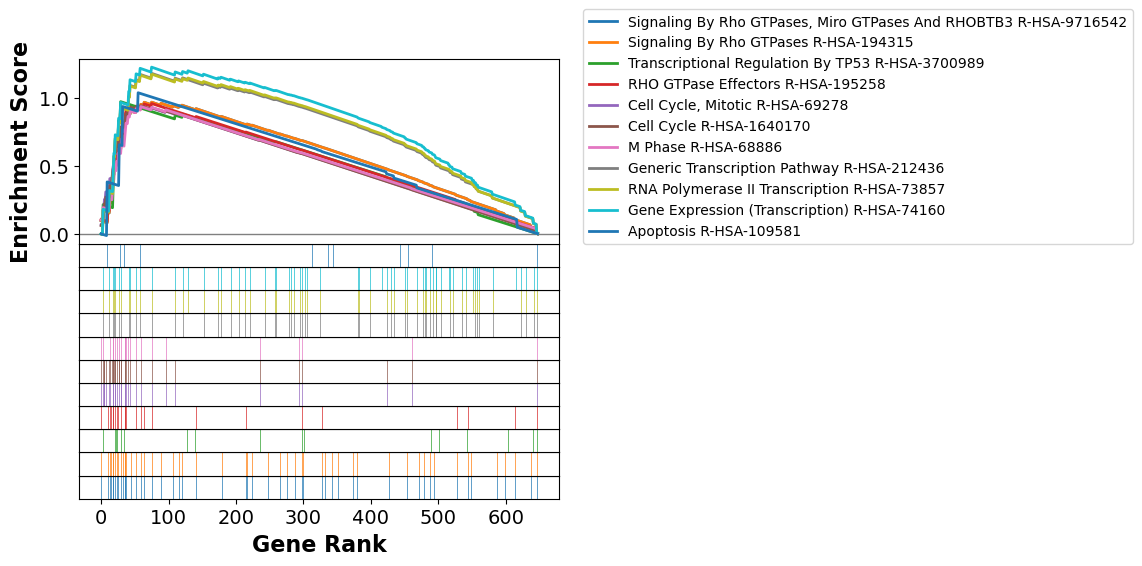

In [282]:
# Visualize the top pathways
terms = res.res2d.Term
print(terms)
axs = res.plot(terms[:11], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

### Get the genes in the pathway

In [277]:
data = res.res2d
type(data)

pandas.core.frame.DataFrame

In [278]:
# Extracting lead_genes
lead_genes = data['Lead_genes'].head(11)

# Printing the lead_genes
for i, genes in enumerate(lead_genes, 1):
    print(f"Row {i} Lead Genes: {genes}")

Row 1 Lead Genes: KIF2C;DIAPH3;BUB1;KIF14;KNL1;BIRC5;CDC20;CDCA8;PRC1;CENPE;ANLN;CENPF;CENPA;SGO2;ECT2;H2AC20;SPDL1;RHPN2;H2AZ1
Row 2 Lead Genes: KIF2C;DIAPH3;BUB1;KIF14;KNL1;BIRC5;CDC20;CDCA8;PRC1;CENPE;ANLN;CENPF;CENPA;SGO2;ECT2;H2AC20;SPDL1;RHPN2;H2AZ1
Row 3 Lead Genes: CDK1;BIRC5;BRIP1;TPX2;CCNB1;AURKA
Row 4 Lead Genes: KIF2C;DIAPH3;BUB1;KIF14;KNL1;BIRC5;CDC20;CDCA8;PRC1;CENPE;CENPF;CENPA;SGO2;H2AC20;SPDL1;RHPN2;H2AZ1
Row 5 Lead Genes: KIF2C;CDK1;GTSE1;TOP2A;HMMR;RRM2;BUB1;KNL1;BIRC5;CDC20;TPX2;CDCA8;CCNB1;AURKA;CENPE;CENPF;CENPA;SGO2;PTTG1;UBE2C;H2AC20;SPDL1
Row 6 Lead Genes: KIF2C;CDK1;GTSE1;TOP2A;HMMR;RRM2;BUB1;HJURP;KNL1;BIRC5;BRIP1;CDC20;TPX2;CDCA8;CCNB1;CLSPN;AURKA;CENPE;CENPF;CENPA;SGO2;PTTG1;UBE2C;H2AC20;SPDL1
Row 7 Lead Genes: KIF2C;CDK1;BUB1;KNL1;BIRC5;CDC20;CDCA8;CCNB1;CENPE;CENPF;CENPA;SGO2;PTTG1;UBE2C;H2AC20;SPDL1
Row 8 Lead Genes: CDK1;RRM2;BIRC5;BRIP1;TPX2;CCNB1;AURKA;ATAD2;UBE2C;H2AC20;GRIN2A;H2AZ1
Row 9 Lead Genes: CDK1;RRM2;BIRC5;BRIP1;TPX2;CCNB1;AURKA;ATAD2;UBE2C

### Get the logFC changes for the comparison or genes?

In [180]:
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/time_adata.h5ad")
adata = sc.read("../../data//time_adata_filt_clust_sign_bif.h5ad")

/storage/users/job37yv/shared_conda_envs/scanpy-env3_shared/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [181]:
## make trivial names unique
adata.var_names = adata.var_names.astype(str)
adata.var_names_make_unique()

In [182]:
adata.var_names

Index(['HES4', 'ISG15', 'C1QTNF12', 'MFAP2', 'PADI2', 'CAMK2N1', 'HSPG2',
       'ID3', 'SFN', 'SESN2',
       ...
       'SHROOM4', 'OPHN1', 'FTX', 'KLHL4', 'BEX2', 'DANT2', 'KLHL13', 'ZNF185',
       'L1CAM', 'MT-CO2'],
      dtype='object', name='gene_symbol', length=650)

In [195]:
import scanpy as sc

# Define a function to label clusters:
# e.g. 5/11 to 2/16 
def label_clusters(cluster):
    if cluster in ["3","15"]:
        return "0"
    elif cluster in ["2","7","14"]:
        return "1"
    else:
        return "NA"  # This label will be used to filter out other clusters

# Create a new categorical column for comparison
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

# Subset the data for only the two groups you're comparing
bdata = adata[adata.obs.compare_clusters.isin(["0", "1"])].copy()

# sort indices to define the direction of comparison (could for interpretation of the results :)
sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
bdata = bdata[sorted_indices]

# Mark these two conditions in the subset
bdata.obs['group_comparison'] = bdata.obs['compare_clusters'].astype(str)


/tmp/ipykernel_1479223/598620802.py:24: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bdata.obs['group_comparison'] = bdata.obs['compare_clusters'].astype(str)


In [196]:
bdata

AnnData object with n_obs × n_vars = 2896 × 650
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 't', 'seg', 'edge', 't_sd', 'milestones', '43->144_lindev_sel', '43->30_lindev_sel', '82->30_lindev_sel', 'compare_clusters', 'group_comparison'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', '43->144_rss', '43->30_rss', '82->30_rss', 'p_val', 'A', 'fdr', 'st', 'signi', 'clusters'
    uns: '43->144_lindev_sel_colors', '43->30<>144'

#### sometimes the base of the logtransformation is not stored properly. this information can be added afterwards. 

In [197]:
if 'log1p' in bdata.uns and 'base' not in bdata.uns['log1p']:
    bdata.uns['log1p']['base'] = np.e  # Assuming natural logarithm was used. Change accordingly if it was a different base.

In [198]:
bdata.uns['log1p']['base']

2.718281828459045

In [262]:
# Now, perform differential expression analysis between the two groups
sc.tl.rank_genes_groups(bdata, 'group_comparison', method='wilcoxon')
#sc.tl.rank_genes_groups(bdata, 'grouping', method='wilcoxon', n_genes=bdata.shape[1])

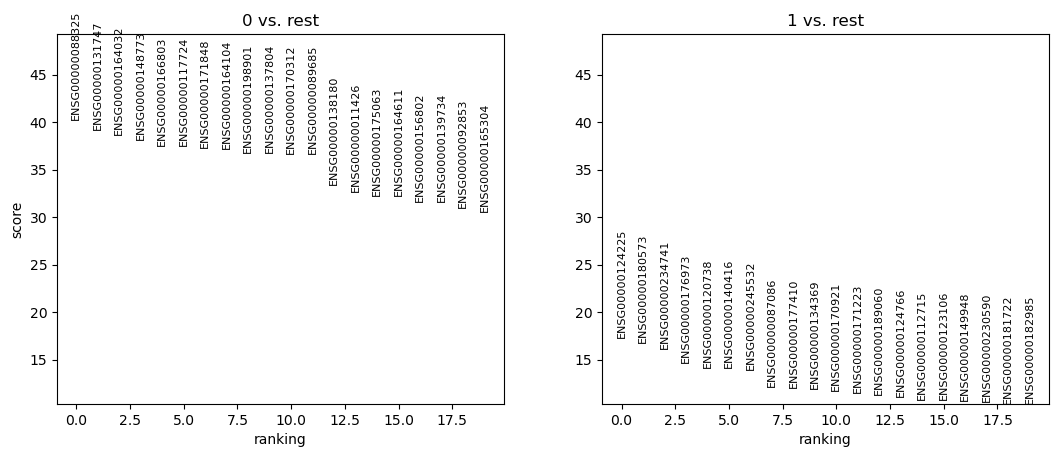

In [263]:
sc.pl.rank_genes_groups(bdata)

In [264]:
# Convert result to dataframe
results = pd.DataFrame({
    'ID': bdata.uns['rank_genes_groups']['names']['0'],
    'log2FC': bdata.uns['rank_genes_groups']['logfoldchanges']['0'],
    'p.value': bdata.uns['rank_genes_groups']['pvals']['0'],
    'adjusted.p.value': bdata.uns['rank_genes_groups']['pvals_adj']['0']
})

# Convert ensembl IDs to gene symbols
results['symbol'] = results['ID'].map(ensembl_to_gene_name).fillna(results['ID'])

# Calculate basemean expression for genes present in adata.var_names
results['basemean'] = [
    (bdata[:, gene].X.sum() / bdata.shape[0]) if gene in bdata.var_names else 'NA' 
    for gene in results['symbol']
]
# Assign comparison name
results['comparison'] = "TGFB_GEM vs." + "TGFB"

In [204]:
#bdata.uns['rank_genes_groups']

In [265]:
print(results)

                   ID    log2FC        p.value  adjusted.p.value  symbol  \
0     ENSG00000088325  4.724960   0.000000e+00      0.000000e+00    TPX2   
1     ENSG00000131747  5.680402   0.000000e+00      0.000000e+00   TOP2A   
2     ENSG00000164032  2.206187   0.000000e+00      0.000000e+00   H2AZ1   
3     ENSG00000148773  5.800885   0.000000e+00      0.000000e+00   MKI67   
4     ENSG00000166803  3.850512  5.729218e-308     2.291687e-305   PCLAF   
...               ...       ...            ...               ...     ...   
1995  ENSG00000120738 -0.695149   3.383440e-45      1.127200e-43    EGR1   
1996  ENSG00000176973 -0.787328   1.162319e-48      4.007997e-47  FAM89B   
1997  ENSG00000234741 -0.746308   7.044240e-59      2.709323e-57    GAS5   
1998  ENSG00000180573 -2.072614   2.037419e-63      7.989879e-62   H2AC6   
1999  ENSG00000124225 -0.604641   8.732785e-67      3.564402e-65  PMEPA1   

      basemean        comparison  
0     0.736457  TGFB_GEM vs.TGFB  
1     0.655727  T

In [272]:
# Reorder columns
results = results[['comparison', 'ID', 'symbol', 'basemean', 'log2FC', 'p.value', 'adjusted.p.value']]
results

,comparison,ID,symbol,basemean,log2FC,p.value,adjusted.p.value
0,TGFB_GEM vs.TGFB,ENSG00000088325,TPX2,0.736457,4.724960,0.000000e+00,0.000000e+00
1,TGFB_GEM vs.TGFB,ENSG00000131747,TOP2A,0.655727,5.680402,0.000000e+00,0.000000e+00
2,TGFB_GEM vs.TGFB,ENSG00000164032,H2AZ1,2.082397,2.206187,0.000000e+00,0.000000e+00
3,TGFB_GEM vs.TGFB,ENSG00000148773,MKI67,0.550729,5.800885,0.000000e+00,0.000000e+00
4,TGFB_GEM vs.TGFB,ENSG00000166803,PCLAF,0.806437,3.850512,5.729218e-308,2.291687e-305
...,...,...,...,...,...,...,...
1995,TGFB_GEM vs.TGFB,ENSG00000120738,EGR1,1.873759,-0.695149,3.383440e-45,1.127200e-43
1996,TGFB_GEM vs.TGFB,ENSG00000176973,FAM89B,1.650798,-0.787328,1.162319e-48,4.007997e-47
1997,TGFB_GEM vs.TGFB,ENSG00000234741,GAS5,2.504036,-0.746308,7.044240e-59,2.709323e-57
1998,TGFB_GEM vs.TGFB,ENSG00000180573,H2AC6,0.590176,-2.072614,2.037419e-63,7.989879e-62


In [279]:
# write to file location
results.to_csv("../../data/diff_anaylsis_TGFB_GEM_vs_TGFB_results_df.csv", index=False)

In [274]:
!pwd

/home2/lumpi/Projects/single-cell_samantha/code/scripts


### Visualize the Pathway and the logFCs of the genes in R

### Some barcode annotation: Forgot why :)

In [ ]:
# Translate Barcode to Conditons
barcode_to_condition = adata.obs['condition'].to_dict()
#barcode_to_condition

# Extract barcodes from GSEA results
#barcodes = res.res2d.index.tolist()
barcodes = res.res2d.columns.tolist()
barcodes

# Print terms
#terms

In [ ]:
#help(gp.gsea)

## Print Heatmap

In [ ]:
from gseapy import heatmap
# plotting heatmap
i = 2
genes = res.res2d.Lead_genes[i].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk


df_heat = res.heatmat.loc[genes]
barcode_to_condition

new_columns = df_heat.columns.map(barcode_to_condition.get)

# Assign the new column names back to the DataFrame
df_heat.columns = new_columns


ax = heatmap(df = df_heat, z_score=0, title=terms[i], figsize=(14,4))

gs_res = res
gs_res.heatmat.loc[genes]


## Plot Bubbleplot

In [166]:
import matplotlib.pyplot as plt

from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(gs_res.res2d,
column="FDR q-val",
title='KEGG_2021_Human',
cmap=plt.cm.viridis,
size=5,
figsize=(4,5), cutoff=1)

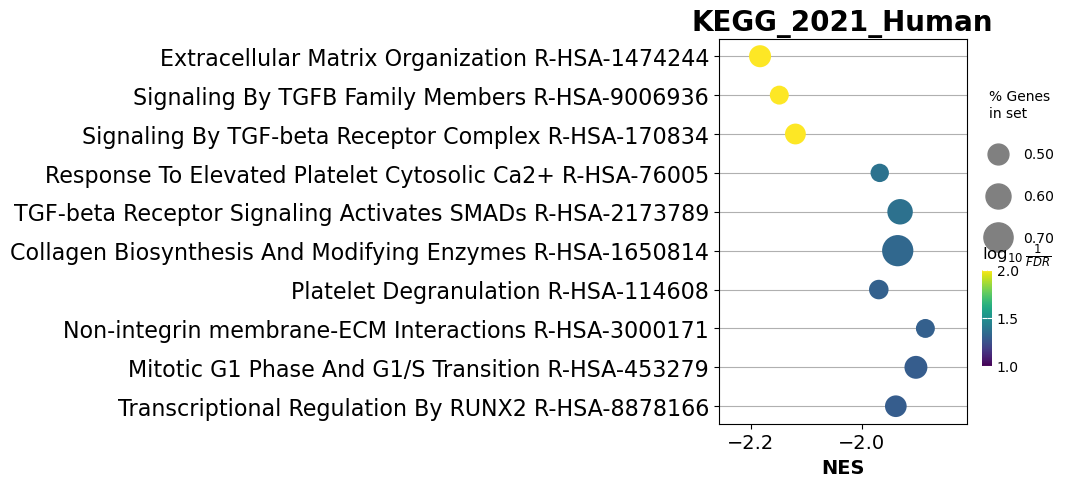

## Plot pathway network

In [168]:
import networkx as nx

In [169]:
res.res2d.head()


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Extracellular Matrix Organization R-HSA-1474244,-0.607517,-2.183252,0.002257,0.005501,0.003,46/87,20.74%,SERPINE1;MMP2;COL1A1;COL5A1;PDGFA;LOX;ADAM19;P...
1,gsea,Signaling By TGFB Family Members R-HSA-9006936,-0.6769,-2.148591,0.0,0.005501,0.005,15/33,8.67%,PMEPA1;SERPINE1;SKIL;ITGAV;BMPR2;SMURF2;ARHGEF...
2,gsea,Signaling By TGF-beta Receptor Complex R-HSA-1...,-0.708324,-2.119574,0.0,0.006112,0.008,13/26,8.67%,PMEPA1;SERPINE1;SKIL;ITGAV;SMURF2;ARHGEF18;SMA...
3,gsea,Collagen Formation R-HSA-1474290,-0.625634,-1.975415,0.002257,0.055464,0.059,22/35,25.57%,COL1A1;COL5A1;LOX;COL22A1;PLOD2;COL7A1;P4HA3;C...
4,gsea,Platelet Degranulation R-HSA-114608,-0.599753,-1.969447,0.0,0.049505,0.065,15/32,16.13%,SERPINE1;PDGFA;PDGFB;TAGLN2;TUBA4A;IGF2;THBS1;...


In [170]:
 nodes, edges = gp.enrichment_map(res.res2d)


In [171]:
nodes.head()


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,Non-integrin membrane-ECM Interactions R-HSA-3...,-0.632753,-1.885516,0.006356,0.049963,0.137,10/22,11.40%,PDGFA;PDGFB;ITGAV;THBS1;SDC1;TGFB1;ITGB3;LAMB3...,1.301351,0.454545
1,gsea,Platelet Degranulation R-HSA-114608,-0.599753,-1.969447,0.0,0.049505,0.065,15/32,16.13%,SERPINE1;PDGFA;PDGFB;TAGLN2;TUBA4A;IGF2;THBS1;...,1.305353,0.468750
2,gsea,Collagen Biosynthesis And Modifying Enzymes R-...,-0.68322,-1.935332,0.002227,0.046525,0.089,18/24,25.57%,COL1A1;COL5A1;COL22A1;PLOD2;COL7A1;P4HA3;COL15...,1.332311,0.750000
3,gsea,TGF-beta Receptor Signaling Activates SMADs R-...,-0.690859,-1.931101,0.0,0.042578,0.089,11/18,17.27%,PMEPA1;ITGAV;SMURF2;SMAD7;TGFB1;LTBP3;TGFBR1;F...,1.370813,0.611111
4,gsea,Response To Elevated Platelet Cytosolic Ca2+ R...,-0.586327,-1.967738,0.0,0.041865,0.065,15/34,16.13%,SERPINE1;PDGFA;PDGFB;TAGLN2;TUBA4A;IGF2;THBS1;...,1.378148,0.441176


In [172]:
edges.head()


,src_idx,targ_idx,src_name,targ_name,jaccard_coef,overlap_coef,overlap_genes
0,0,1,Non-integrin membrane-ECM Interactions R-HSA-3...,Platelet Degranulation R-HSA-114608,0.250000,0.5,"PDGFB,ITGB3,THBS1,PDGFA,TGFB1"
1,0,3,Non-integrin membrane-ECM Interactions R-HSA-3...,TGF-beta Receptor Signaling Activates SMADs R-...,0.166667,0.3,"ITGB3,ITGAV,TGFB1"
2,0,4,Non-integrin membrane-ECM Interactions R-HSA-3...,Response To Elevated Platelet Cytosolic Ca2+ R...,0.250000,0.5,"PDGFB,ITGB3,THBS1,PDGFA,TGFB1"
3,0,5,Non-integrin membrane-ECM Interactions R-HSA-3...,Signaling By TGF-beta Receptor Complex R-HSA-1...,0.150000,0.3,"ITGB3,ITGAV,TGFB1"
4,0,6,Non-integrin membrane-ECM Interactions R-HSA-3...,Extracellular Matrix Organization R-HSA-1474244,0.217391,1.0,"PDGFB,ITGA2,ITGB3,THBS1,PDGFA,SDC2,LAMB3,ITGAV..."


In [175]:
# build graph
G = nx.from_pandas_edgelist(edges,
    source='src_idx',
    target='targ_idx',
    edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])


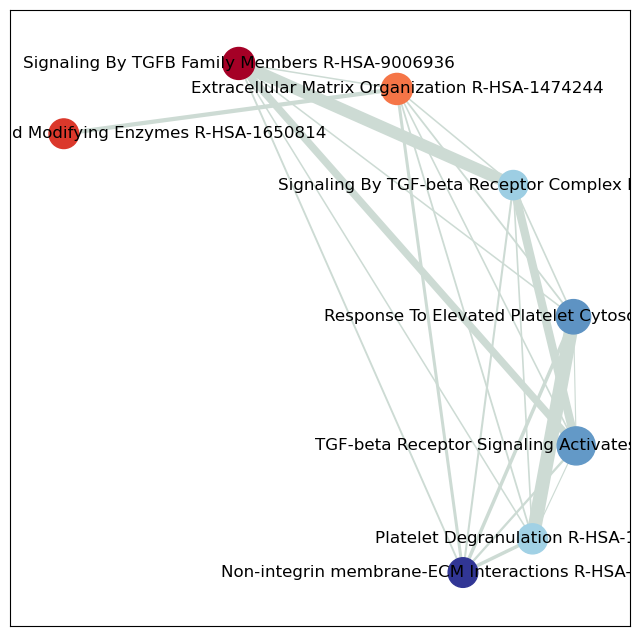

In [176]:
fig, ax = plt.subplots(figsize=(8, 8))
# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
pos=pos,
cmap=plt.cm.RdYlBu,
node_color=list(nodes.NES),
node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
pos=pos,
labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
pos=pos,
width=list(map(lambda x: x*10, edge_weight)),
edge_color='#CDDBD4')
plt.show()
